In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
baseline = pd.read_csv("opt_baseline.csv")
baseline = baseline.iloc[-1]['income'] - baseline.iloc[-1]['wage']

In [3]:
x = range(6)
y = []
y2 = []
for i in x:
    df = pd.read_csv("opt_"+str(i*5)+"_2.csv")
    y.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
for i in x:
    df = pd.read_csv("opt_"+str(i*5)+"_3.csv")
    y2.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])

In [11]:
x2 = range(6)

y3 = []
for i in x2:
    df = pd.read_csv("qlearning_"+str(i)+".csv")
    y3.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])

In [5]:
import matplotlib

In [6]:
matplotlib.rcParams.update({
    'figure.dpi': 300,
    'figure.titlesize': 15,
    'axes.titlesize': 15,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'legend.title_fontsize': 13
})

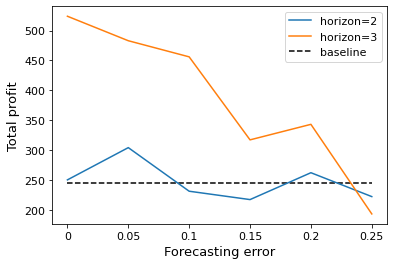

In [9]:
fig,ax = plt.subplots()

plt.plot(x,y,label='horizon=2')
plt.plot(x,y2, label='horizon=3')
plt.hlines(y = baseline, xmin=0, xmax=5, color = 'black', ls = '--', label='baseline')
plt.legend()
plt.xlabel("Forecasting error")

plt.xticks([0,1,2,3,4,5],[0,0.05,0.1,0.15,0.2,0.25])
plt.ylabel("Total profit")

plt.savefig("result.png")

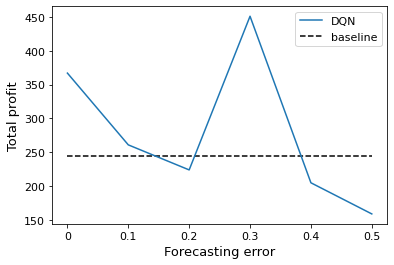

In [12]:
fig,ax = plt.subplots()

plt.plot(x2,y3,label='DQN')
plt.hlines(y = baseline, xmin=0, xmax=5, color = 'black', ls = '--', label='baseline')
plt.legend()
plt.xlabel("Forecasting error")

plt.xticks([0,1,2,3,4,5],[0,0.1,0.2,0.3,0.4,0.5])
plt.ylabel("Total profit")

plt.savefig("result2.png")

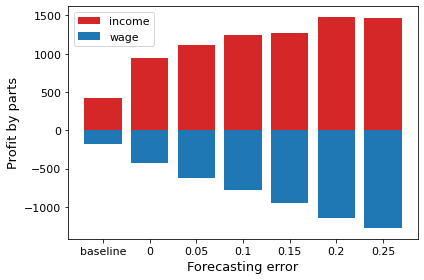

In [22]:
x = list(range(6))
y = []
y2 = []
for i in x:
    df = pd.read_csv("opt_"+str(i*5)+"_3.csv")
    y.append(df.iloc[-1]['income'])
    
for i in x:
    df = pd.read_csv("opt_"+str(i*5)+"_3.csv")
    y2.append(df.iloc[-1]['wage'])

baseline = pd.read_csv("opt_baseline.csv")

x = [-1]+x
y = [baseline.iloc[-1]['income']]+y
y2 = [baseline.iloc[-1]['wage']] + y2

fig,ax = plt.subplots()

plt.bar(np.array(x),y,  label='income', color = 'C3')
plt.bar(np.array(x),-np.array(y2),label='wage', color = 'C0')
plt.legend()
plt.xlabel("Forecasting error")

plt.xticks([-1, 0,1,2,3,4,5],["baseline",0,0.05,0.1,0.15,0.2,0.25])
plt.ylabel("Profit by parts")
plt.tight_layout()
plt.savefig("result3.png")

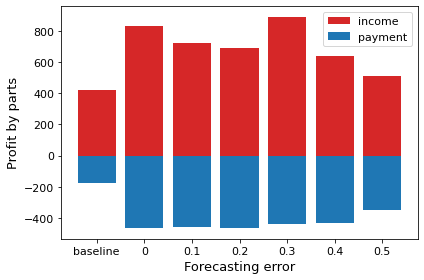

In [24]:
x = list(range(6))
y = []
y2 = []
for i in x:
    df = pd.read_csv("qlearning_"+str(i)+".csv")
    y.append(df.iloc[-1]['income'])
    
for i in x:
    df = pd.read_csv("qlearning_"+str(i)+".csv")
    y2.append(df.iloc[-1]['wage'])

baseline = pd.read_csv("opt_baseline.csv")

x = [-1]+x
y = [baseline.iloc[-1]['income']]+y
y2 = [baseline.iloc[-1]['wage']] + y2

fig,ax = plt.subplots()

plt.bar(np.array(x),y,  label='income', color = 'C3')
plt.bar(np.array(x),-np.array(y2),label='payment', color = 'C0')
plt.legend()
plt.xlabel("Forecasting error")

plt.xticks([-1, 0,1,2,3,4,5],["baseline",0,0.1,0.2,0.3,0.4,0.5])
plt.ylabel("Profit by parts")
plt.tight_layout()
plt.savefig("result4.png")

In [92]:
b = []


df = pd.read_csv("opt_baseline_under.csv")
b.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])


df = pd.read_csv("opt_baseline.csv")
b.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])

df = pd.read_csv("opt_baseline_above.csv")
b.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])

In [123]:
x = range(6)
y = []
y2 = []
y3 = []
for i in x:
    df = pd.read_csv("opt_"+str(i*5)+"_3.csv")
    y.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
    df = pd.read_csv("opt_"+str(i*5)+"_3_under.csv")
    y2.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
    df = pd.read_csv("opt_"+str(i*5)+"_3_above.csv")
    y3.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
y_= np.column_stack((y2,y,y3))

In [124]:
import matplotlib

In [125]:
colors = matplotlib.cm.get_cmap('Reds',6)

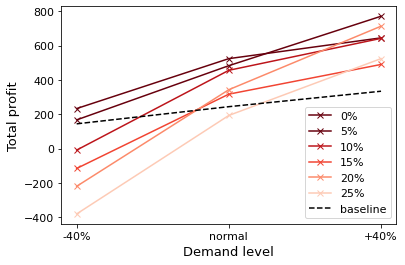

In [126]:
fig,ax = plt.subplots()

for i in range(6):
    plt.plot(range(3),y_[i,:],'-x',color = colors(6-i), label=str(int(i*0.05*100))+"%")
    
plt.plot(range(3),b, color = 'black', ls = '--', label='baseline')
plt.legend()
plt.xlabel("Demand level")
plt.ylabel("Total profit")

plt.xticks([0,1,2],['-40%', 'normal', '+40%'])

plt.savefig("result5.png")

In [121]:
x = range(6)
y = []
y2 = []
y3 = []
for i in x:
    df = pd.read_csv("qlearning_"+str(i)+".csv")
    y.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
    df = pd.read_csv("qlearning_"+str(i)+"_under.csv")
    y2.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
    df = pd.read_csv("qlearning_"+str(i)+"_above.csv")
    y3.append(df.iloc[-1]['income']-df.iloc[-1]['wage'])
    
y_= np.column_stack((y2,y,y3))

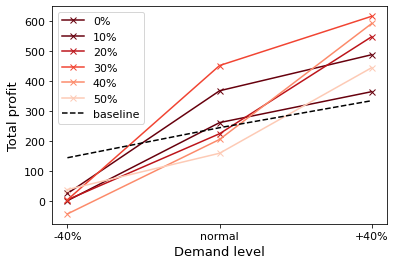

In [122]:
fig,ax = plt.subplots()

for i in range(6):
    plt.plot(range(3),y_[i,:],'-x',color = colors(6-i), label=str(int(i*0.1*100))+"%")
    
plt.plot(range(3),b, color = 'black', ls = '--', label='baseline')
plt.legend()
plt.xlabel("Demand level")
plt.ylabel("Total profit")

plt.xticks([0,1,2],['-40%', 'normal', '+40%'])

plt.savefig("result6.png")